In [34]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from palettable.colorbrewer.qualitative import Pastel1_7
from sklearn.ensemble import RandomForestClassifier

### Análisis exploratorio de los datos 

In [3]:
df=pd.read_csv('Frogs_MFCCs.csv')
df

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...        ...       ...       ...       ...       ...       ...       ...   
7190       1.0 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889   
7191       1.0 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628   
7192       1.0 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905   
7193       1.0 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.086866   
7194       1.0 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  \
0    -0.150063 -0.171128  0.124676  ... -0.108351 -0.077623 -0.009568   
1    -0.222475 -0.207693  0.170883  ... -0.090974 -0.056510 -0.035303   
2    -0.242234 -0.219153  0.232538  ... -0.050691 -0.023590 -0.066722   
3    -0.194347 -0.098181  0.270375  ... -0.136009 -0.177037 -0.130498   
4    -0.265423 -0.172700  0.266434  ... -0.048885 -0.053074 -0.088550   
...        ...       ...       ...  ...       ...       ...       ...   
7190 -0.100753  0.037087  0.081075  ...  0.069430  0.071001  0.021591   
7191 -0.116460  0.063727  0.089034  ...  0.061127  0.068978  0.017745   
7192 -0.103317  0.070370  0.081317  ...  0.082474  0.077771 -0.009688   
7193 -0.115799  0.056979  0.089316  ...  0.051796  0.069073  0.017963   
7194 -0.117672  0.058874  0.076180  ...  0.061455  0.072983 -0.003980   

      MFCCs_20  MFCCs_21  MFCCs_22           Family      Genus  \
0     0.057684  0.118680  0.014038  Leptodactylidae  Adenomera   
1     0.020140  0.082263  0.029056  Leptodactylidae  Adenomera   
2    -0.025083  0.099108  0.077162  Leptodactylidae  Adenomera   
3    -0.054766 -0.018691  0.023954  Leptodactylidae  Adenomera   
4    -0.031346  0.108610  0.079244  Leptodactylidae  Adenomera   
...        ...       ...       ...              ...        ...   
7190  0.052449 -0.021860 -0.079860          Hylidae     Scinax   
7191  0.046461 -0.015418 -0.101892          Hylidae     Scinax   
7192  0.027834 -0.000531 -0.080425          Hylidae     Scinax   
7193  0.041803 -0.027911 -0.096895          Hylidae     Scinax   
7194  0.031560 -0.029355 -0.087910          Hylidae     Scinax   

             Species  RecordID  
0     AdenomeraAndre         1  
1     AdenomeraAndre         1  
2     AdenomeraAndre         1  
3     AdenomeraAndre         1  
4     AdenomeraAndre         1  
...              ...       ...  
7190     ScinaxRuber        60  
7191     ScinaxRuber        60  
7192     ScinaxRuber        60  
7193     ScinaxRuber        60  
7194     ScinaxRuber        60  

[7195 rows x 26 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_ 9  7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13  7195 non-null   float64
 13  MFCCs_14  7195 non-null   float64
 14  MFCCs_15  7195 non-null   float64
 15  MFCCs_16  7195 non-null   float64
 16  MFCCs_17  7195 non-null   float64
 17  MFCCs_18  7195 non-null   float64
 18  MFCCs_19  7195 non-null   float64
 19  MFCCs_20  7195 non-null   float64
 20  MFCCs_21  7195 non-null   floa

In [5]:
df.nunique()

MFCCs_ 1     249
MFCCs_ 2    7140
MFCCs_ 3    7026
MFCCs_ 4    7175
MFCCs_ 5    7195
MFCCs_ 6    7195
MFCCs_ 7    7195
MFCCs_ 8    7195
MFCCs_ 9    7195
MFCCs_10    7195
MFCCs_11    7195
MFCCs_12    7195
MFCCs_13    7195
MFCCs_14    7195
MFCCs_15    7195
MFCCs_16    7195
MFCCs_17    7195
MFCCs_18    7195
MFCCs_19    7195
MFCCs_20    7195
MFCCs_21    7195
MFCCs_22    7195
Family         4
Genus          8
Species       10
RecordID      60
dtype: int64

In [6]:
df.isnull().sum()

MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
Family      0
Genus       0
Species     0
RecordID    0
dtype: int64

In [7]:
df.describe()

MFCCs_ 1     MFCCs_ 2     MFCCs_ 3     MFCCs_ 4     MFCCs_ 5  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000   
mean      0.989885     0.323584     0.311224     0.445997     0.127046   
std       0.069016     0.218653     0.263527     0.160328     0.162722   
min      -0.251179    -0.673025    -0.436028    -0.472676    -0.636012   
25%       1.000000     0.165945     0.138445     0.336737     0.051717   
50%       1.000000     0.302184     0.274626     0.481463     0.161361   
75%       1.000000     0.466566     0.430695     0.559861     0.222592   
max       1.000000     1.000000     1.000000     1.000000     0.752246   

          MFCCs_ 6     MFCCs_ 7     MFCCs_ 8     MFCCs_ 9     MFCCs_10  ...  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000  ...   
mean      0.097939    -0.001397    -0.000370     0.128213     0.055998  ...   
std       0.120412     0.171404     0.116302     0.179008     0.127099  ...   
min      -0.410417    -0.538982    -0.576506    -0.587313    -0.952266  ...   
25%       0.012581    -0.125737    -0.063109     0.004648    -0.001132  ...   
50%       0.072079    -0.052630     0.013265     0.189317     0.063478  ...   
75%       0.175957     0.085580     0.075108     0.265395     0.117725  ...   
max       0.964240     1.000000     0.551762     0.738033     0.522768  ...   

          MFCCs_14     MFCCs_15     MFCCs_16     MFCCs_17     MFCCs_18  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000   
mean     -0.039244    -0.101748     0.042062     0.088680     0.007755   
std       0.152515     0.187618     0.119915     0.138055     0.084733   
min      -0.590380    -0.717156    -0.498675    -0.421480    -0.759322   
25%      -0.132980    -0.255929    -0.019549    -0.001764    -0.042122   
50%      -0.050715    -0.143259     0.041081     0.112769     0.011820   
75%       0.039157     0.017348     0.107046     0.201932     0.061889   
max       0.575749     0.668924     0.670700     0.681157     0.614064   

          MFCCs_19     MFCCs_20     MFCCs_21     MFCCs_22     RecordID  
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000  
mean     -0.049474    -0.053244     0.037313     0.087567    25.220014  
std       0.082546     0.094181     0.079470     0.123442    13.214399  
min      -0.680745    -0.361649    -0.430812    -0.379304     1.000000  
25%      -0.106079    -0.120971    -0.017620     0.000533    15.000000  
50%      -0.052626    -0.055180     0.031274     0.105373    22.000000  
75%       0.006321     0.001342     0.089619     0.194819    37.000000  
max       0.574209     0.467831     0.389797     0.432207    60.000000  

[8 rows x 23 columns]

/tmp/ipykernel_89609/195152894.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_89609/195152894.py:2: UserWarning:

The palette list has more values (8) than needed (4), which may not be intended.



<Axes: xlabel='Family', ylabel='count'>

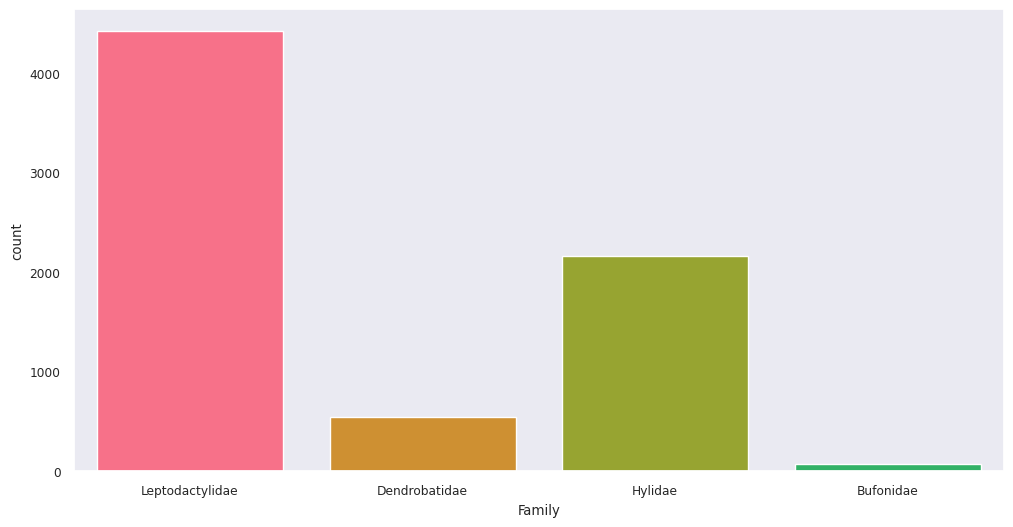

In [56]:
sns.set_style("dark")
sns.countplot(x="Family", data=df, palette=sns.color_palette("husl", 8), saturation=10)

/tmp/ipykernel_89609/1881569559.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Genus", data=df, palette=sns.color_palette("husl", 8),


<Axes: xlabel='Genus', ylabel='count'>

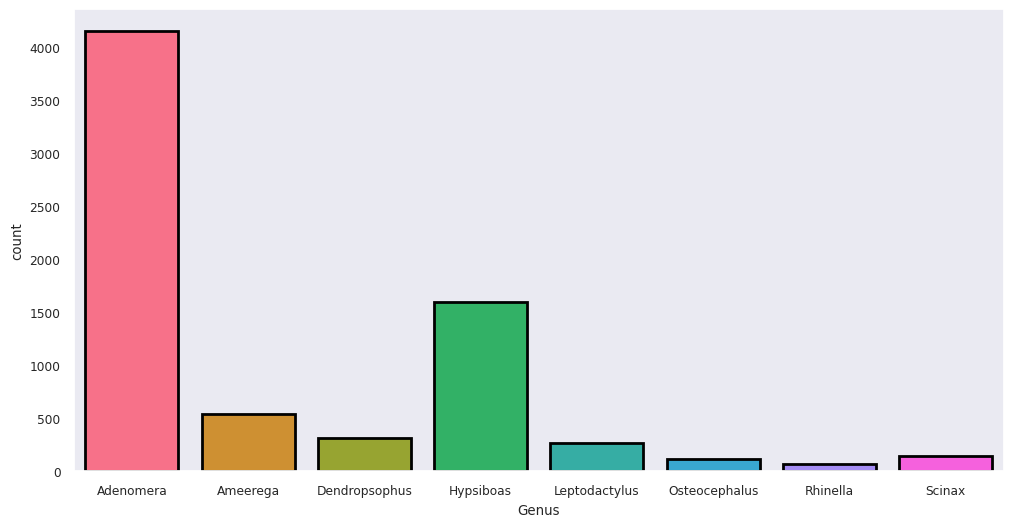

In [16]:
sns.set(rc={"font.style":"normal",
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(12, 6),
            'xtick.labelsize':20,
            'ytick.labelsize':20})

sns.set(style="white",font_scale=0.8)


sns.set_style("dark")
sns.countplot(x="Genus", data=df, palette=sns.color_palette("husl", 8), 
              saturation=10, edgecolor=(0,0,0), linewidth=2)

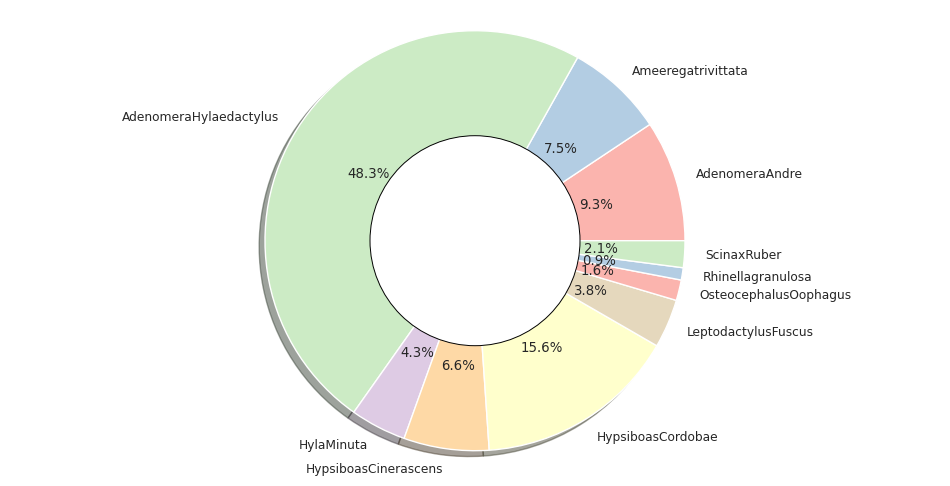

In [15]:
# create data
names=list(df["Species"].unique())
sizes=[df["Species"].value_counts()[unique_class]*100/len(df["Species"]) for unique_class in names]
colors = Pastel1_7.hex_colors
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # explode a slice if required

plt.pie(sizes, explode=explode, labels=names, colors=colors,
        autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0), 0.50, color='black', fc='white',linewidth=0.70)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

In [17]:
cat_feature_col=["Family", "Genus", "Species"]
for i in cat_feature_col:
    print(f"{i} : {df[i].unique()}")
    print(df[i].value_counts())
    print("----------------------------------------------------------------")

Family : ['Leptodactylidae' 'Dendrobatidae' 'Hylidae' 'Bufonidae']
Family
Leptodactylidae    4420
Hylidae            2165
Dendrobatidae       542
Bufonidae            68
Name: count, dtype: int64
----------------------------------------------------------------
Genus : ['Adenomera' 'Ameerega' 'Dendropsophus' 'Hypsiboas' 'Leptodactylus'
 'Osteocephalus' 'Rhinella' 'Scinax']
Genus
Adenomera        4150
Hypsiboas        1593
Ameerega          542
Dendropsophus     310
Leptodactylus     270
Scinax            148
Osteocephalus     114
Rhinella           68
Name: count, dtype: int64
----------------------------------------------------------------
Species : ['AdenomeraAndre' 'Ameeregatrivittata' 'AdenomeraHylaedactylus'
 'HylaMinuta' 'HypsiboasCinerascens' 'HypsiboasCordobae'
 'LeptodactylusFuscus' 'OsteocephalusOophagus' 'Rhinellagranulosa'
 'ScinaxRuber']
Species
AdenomeraHylaedactylus    3478
HypsiboasCordobae         1121
AdenomeraAndre             672
Ameeregatrivittata         542
Hypsib

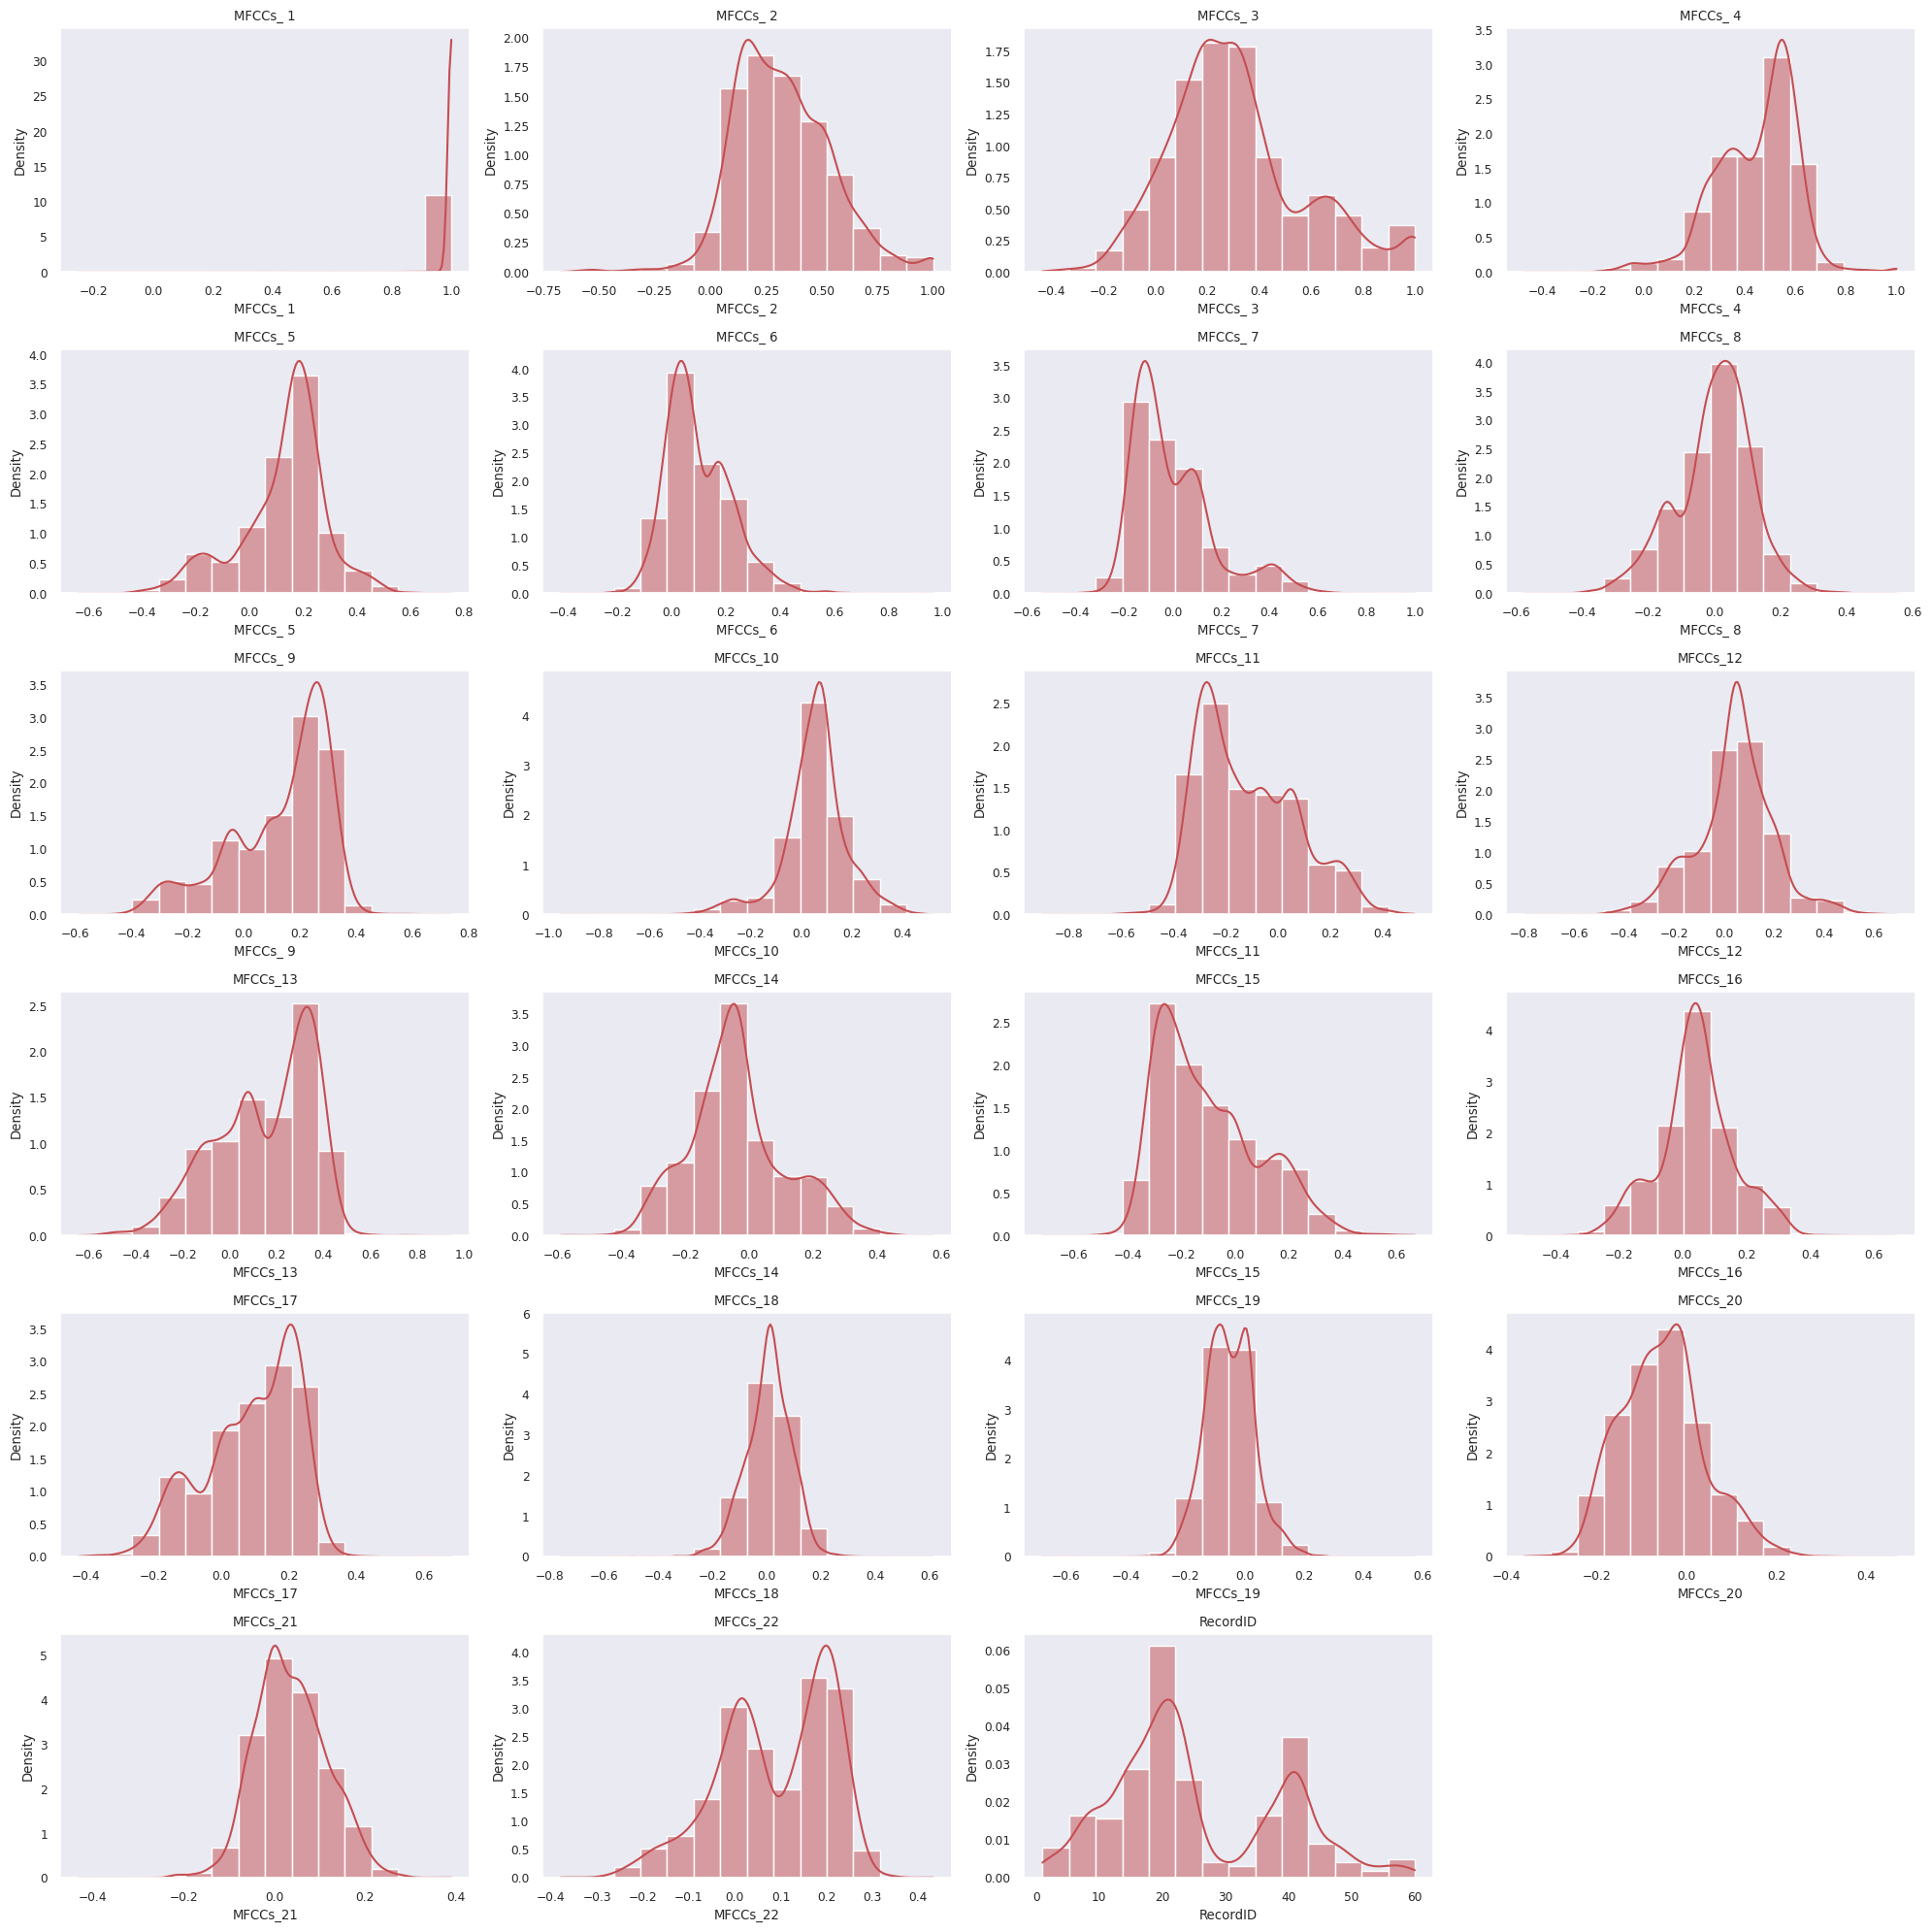

In [58]:
cont_feature_col = df.drop(cat_feature_col, axis=1).columns.to_list()
cont_df = df[cont_feature_col]
plt.figure(figsize=(20, 20))

for i in range(1, 24):
    plt.subplot(6, 4, i)
    sns.histplot(cont_df[cont_df.columns[i-1]], bins=14, kde=True, color="r", stat="density")
    plt.title(cont_df.columns[i-1])  # Agregar título para cada subplot

plt.tight_layout()
plt.show()

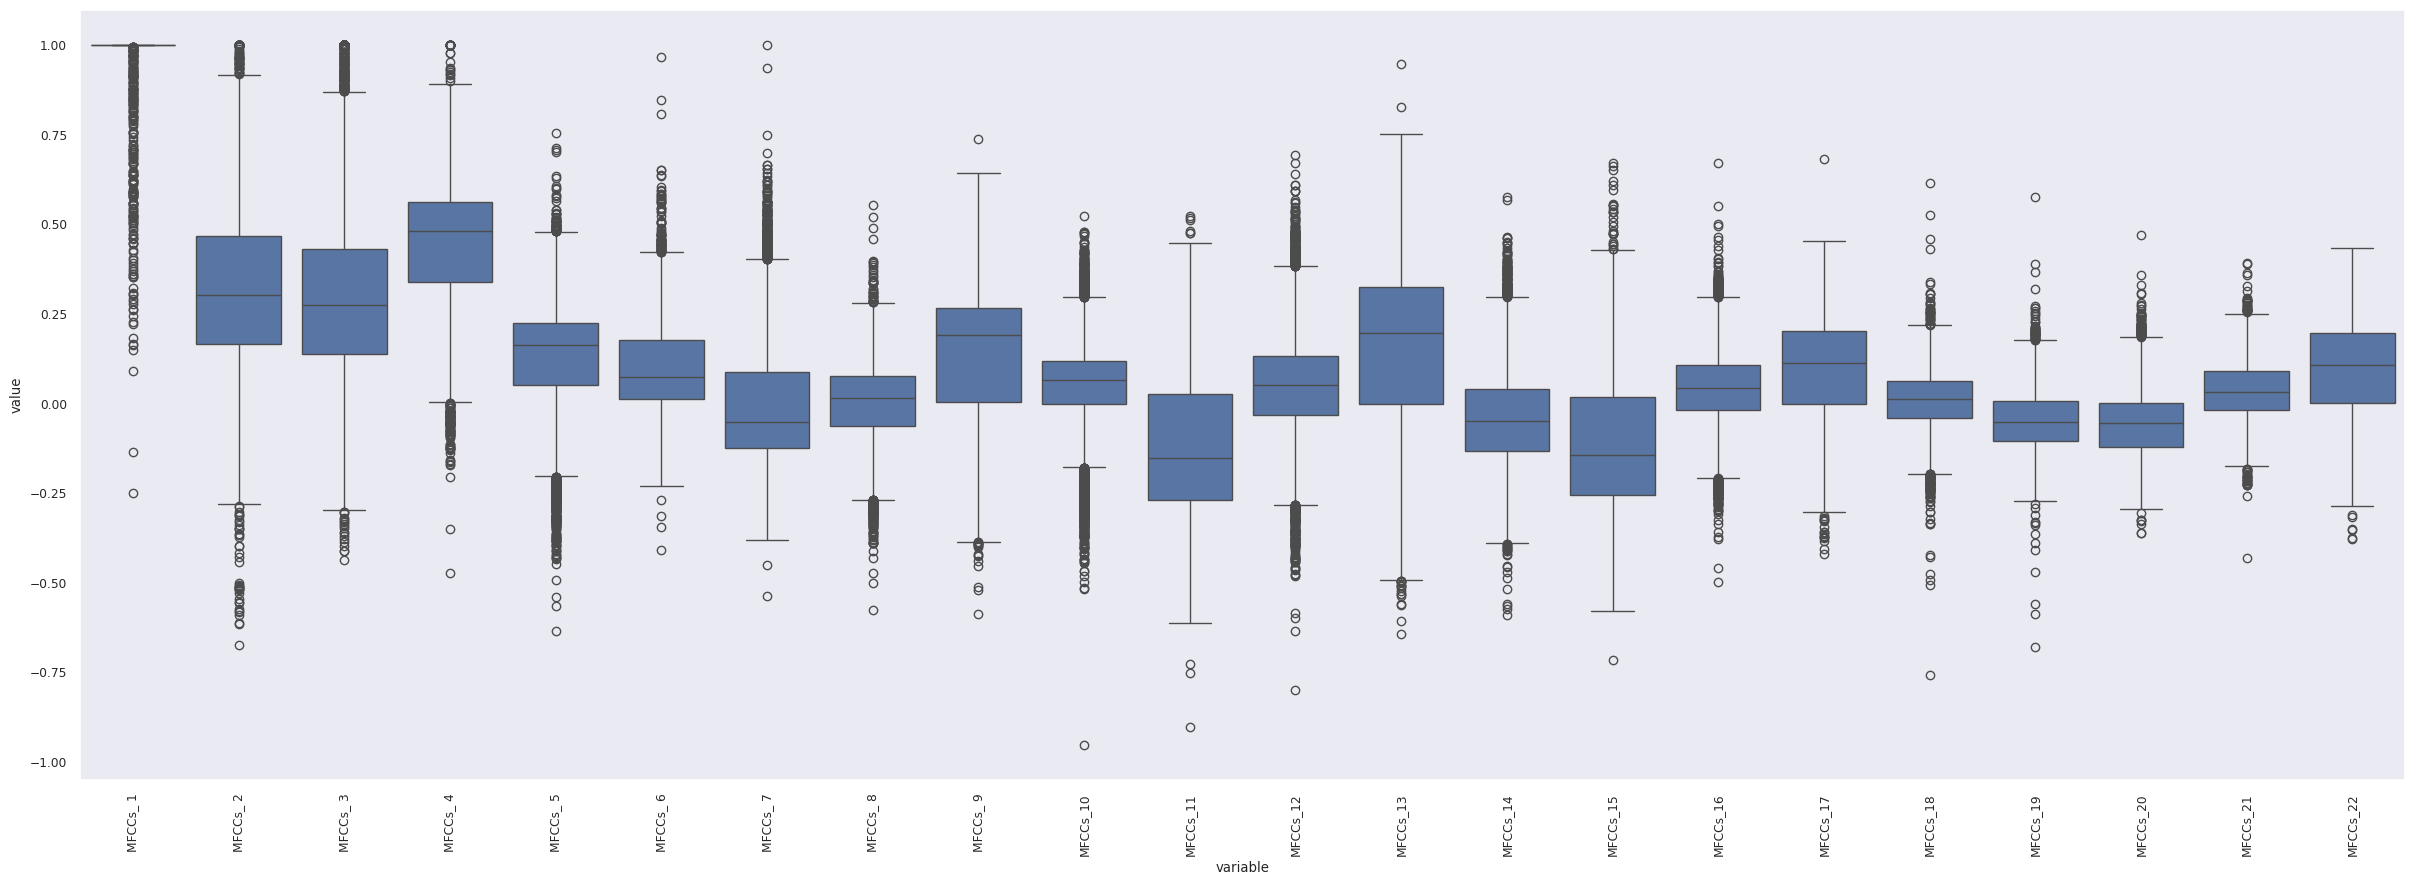

In [20]:
plt.figure(figsize=(30,10))
sns.boxplot(x="variable", y="value", data=pd.melt(cont_df.drop('RecordID', axis=1)))
plt.xticks(rotation=90)
plt.show()

In [21]:
# find the IQR
q1 = df[cont_feature_col].quantile(.25)
q3 = df[cont_feature_col].quantile(.75)
IQR = q3-q1

outliers_df = np.logical_or((df[cont_feature_col] < (q1 - 1.5 * IQR)), (df[cont_feature_col] > (q3 + 1.5 * IQR))) 

outlier_list=[]
total_outlier=[]
for col in list(outliers_df.columns):
    try:
        total_outlier.append(outliers_df[col].value_counts()[True])
        outlier_list.append((outliers_df[col].value_counts()[True] / outliers_df[col].value_counts().sum()) * 100)
    except:
        outlier_list.append(0)
        total_outlier.append(0)
        
outlier_list

outlier_df=pd.DataFrame(zip(list(outliers_df.columns), total_outlier, outlier_list), columns=['name of the column', 'total', 'outlier(%)'])

#see totally how many outliers in cont features
outlier_df.set_index('name of the column', inplace=True)
#del outlier_df.index.name
outlier_df

total  outlier(%)
name of the column                   
MFCCs_ 1              248    3.446838
MFCCs_ 2              135    1.876303
MFCCs_ 3              325    4.517026
MFCCs_ 4              139    1.931897
MFCCs_ 5              423    5.879083
MFCCs_ 6               86    1.195274
MFCCs_ 7              333    4.628214
MFCCs_ 8              166    2.307158
MFCCs_ 9               18    0.250174
MFCCs_10              594    8.255733
MFCCs_11                9    0.125087
MFCCs_12              358    4.975678
MFCCs_13               19    0.264072
MFCCs_14              170    2.362752
MFCCs_15               29    0.403058
MFCCs_16              306    4.252953
MFCCs_17               17    0.236275
MFCCs_18              130    1.806810
MFCCs_19               62    0.861710
MFCCs_20               83    1.153579
MFCCs_21               59    0.820014
MFCCs_22                6    0.083391
RecordID                0    0.000000

In [22]:
df_cont=df[cont_feature_col]
out_nan_df=df_cont[~outliers_df]
out_nan_df

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...        ...       ...       ...       ...       ...       ...       ...   
7190       1.0       NaN       NaN  0.035533  0.034511       NaN  0.093889   
7191       1.0       NaN       NaN  0.030673  0.068097  0.402890  0.096628   
7192       1.0       NaN       NaN  0.029468  0.064179  0.385596  0.114905   
7193       1.0       NaN       NaN       NaN  0.072865  0.377131  0.086866   
7194       1.0       NaN       NaN  0.062068  0.078211  0.397188  0.094596   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_14  MFCCs_15  MFCCs_16  \
0    -0.150063 -0.171128  0.124676  ...  0.082245  0.135752 -0.024017   
1    -0.222475 -0.207693  0.170883  ...  0.022786  0.163320  0.012022   
2    -0.242234 -0.219153  0.232538  ...  0.050791  0.207338  0.083536   
3    -0.194347 -0.098181  0.270375  ... -0.011567  0.100413 -0.050224   
4    -0.265423 -0.172700  0.266434  ...  0.037439  0.219153  0.062837   
...        ...       ...       ...  ...       ...       ...       ...   
7190 -0.100753  0.037087  0.081075  ... -0.059364  0.024206 -0.000861   
7191 -0.116460  0.063727  0.089034  ... -0.105600  0.030767  0.006457   
7192 -0.103317  0.070370  0.081317  ... -0.078615  0.024861  0.008696   
7193 -0.115799  0.056979  0.089316  ... -0.075320  0.022903  0.001924   
7194 -0.117672  0.058874  0.076180  ... -0.073415  0.042517  0.004158   

      MFCCs_17  MFCCs_18  MFCCs_19  MFCCs_20  MFCCs_21  MFCCs_22  RecordID  
0    -0.108351 -0.077623 -0.009568  0.057684  0.118680  0.014038         1  
1    -0.090974 -0.056510 -0.035303  0.020140  0.082263  0.029056         1  
2    -0.050691 -0.023590 -0.066722 -0.025083  0.099108  0.077162         1  
3    -0.136009 -0.177037 -0.130498 -0.054766 -0.018691  0.023954         1  
4    -0.048885 -0.053074 -0.088550 -0.031346  0.108610  0.079244         1  
...        ...       ...       ...       ...       ...       ...       ...  
7190  0.069430  0.071001  0.021591  0.052449 -0.021860 -0.079860        60  
7191  0.061127  0.068978  0.017745  0.046461 -0.015418 -0.101892        60  
7192  0.082474  0.077771 -0.009688  0.027834 -0.000531 -0.080425        60  
7193  0.051796  0.069073  0.017963  0.041803 -0.027911 -0.096895        60  
7194  0.061455  0.072983 -0.003980  0.031560 -0.029355 -0.087910        60  

[7195 rows x 23 columns]

In [23]:
for col in cont_feature_col:
  col_mean=df[col].mean() #calculate mean for each col
  out_nan_df[col]=out_nan_df[col].fillna(col_mean) #first convert outliers to Nan values then fill Nan's with col mean
  #df[cont_feature_col]=df_cont

In [24]:
df_only_cat=df.drop(columns=cont_feature_col)

In [25]:
#concat df_only_cat and clear cont_df of outliers
df_final=pd.concat([out_nan_df, df_only_cat], axis=1)

In [26]:
df_final

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...        ...       ...       ...       ...       ...       ...       ...   
7190       1.0  0.323584  0.311224  0.035533  0.034511  0.097939  0.093889   
7191       1.0  0.323584  0.311224  0.030673  0.068097  0.402890  0.096628   
7192       1.0  0.323584  0.311224  0.029468  0.064179  0.385596  0.114905   
7193       1.0  0.323584  0.311224  0.445997  0.072865  0.377131  0.086866   
7194       1.0  0.323584  0.311224  0.062068  0.078211  0.397188  0.094596   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  \
0    -0.150063 -0.171128  0.124676  ... -0.108351 -0.077623 -0.009568   
1    -0.222475 -0.207693  0.170883  ... -0.090974 -0.056510 -0.035303   
2    -0.242234 -0.219153  0.232538  ... -0.050691 -0.023590 -0.066722   
3    -0.194347 -0.098181  0.270375  ... -0.136009 -0.177037 -0.130498   
4    -0.265423 -0.172700  0.266434  ... -0.048885 -0.053074 -0.088550   
...        ...       ...       ...  ...       ...       ...       ...   
7190 -0.100753  0.037087  0.081075  ...  0.069430  0.071001  0.021591   
7191 -0.116460  0.063727  0.089034  ...  0.061127  0.068978  0.017745   
7192 -0.103317  0.070370  0.081317  ...  0.082474  0.077771 -0.009688   
7193 -0.115799  0.056979  0.089316  ...  0.051796  0.069073  0.017963   
7194 -0.117672  0.058874  0.076180  ...  0.061455  0.072983 -0.003980   

      MFCCs_20  MFCCs_21  MFCCs_22  RecordID           Family      Genus  \
0     0.057684  0.118680  0.014038         1  Leptodactylidae  Adenomera   
1     0.020140  0.082263  0.029056         1  Leptodactylidae  Adenomera   
2    -0.025083  0.099108  0.077162         1  Leptodactylidae  Adenomera   
3    -0.054766 -0.018691  0.023954         1  Leptodactylidae  Adenomera   
4    -0.031346  0.108610  0.079244         1  Leptodactylidae  Adenomera   
...        ...       ...       ...       ...              ...        ...   
7190  0.052449 -0.021860 -0.079860        60          Hylidae     Scinax   
7191  0.046461 -0.015418 -0.101892        60          Hylidae     Scinax   
7192  0.027834 -0.000531 -0.080425        60          Hylidae     Scinax   
7193  0.041803 -0.027911 -0.096895        60          Hylidae     Scinax   
7194  0.031560 -0.029355 -0.087910        60          Hylidae     Scinax   

             Species  
0     AdenomeraAndre  
1     AdenomeraAndre  
2     AdenomeraAndre  
3     AdenomeraAndre  
4     AdenomeraAndre  
...              ...  
7190     ScinaxRuber  
7191     ScinaxRuber  
7192     ScinaxRuber  
7193     ScinaxRuber  
7194     ScinaxRuber  

[7195 rows x 26 columns]

In [27]:
df_final.describe()

MFCCs_ 1     MFCCs_ 2     MFCCs_ 3     MFCCs_ 4     MFCCs_ 5  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000   
mean      0.999651     0.319202     0.285052     0.451125     0.143824   
std       0.001845     0.196578     0.221701     0.142925     0.129104   
min       0.989885    -0.281729    -0.298004     0.003445    -0.204287   
25%       1.000000     0.168399     0.140086     0.345174     0.084308   
50%       1.000000     0.304700     0.276151     0.479685     0.159501   
75%       1.000000     0.454898     0.396742     0.558852     0.220429   
max       1.000000     0.916370     0.868864     0.890478     0.478334   

          MFCCs_ 6     MFCCs_ 7     MFCCs_ 8     MFCCs_ 9     MFCCs_10  ...  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000  ...   
mean      0.093548    -0.023046     0.003346     0.129450     0.064350  ...   
std       0.111292     0.135238     0.105110     0.176761     0.084746  ...   
min      -0.231343    -0.382661    -0.269935    -0.385841    -0.179257  ...   
25%       0.012704    -0.125715    -0.054718     0.008309     0.014905  ...   
50%       0.072375    -0.052569     0.011950     0.189308     0.056564  ...   
75%       0.172100     0.062201     0.073497     0.265347     0.108513  ...   
max       0.420539     0.402069     0.280784     0.642738     0.295838  ...   

          MFCCs_14     MFCCs_15     MFCCs_16     MFCCs_17     MFCCs_18  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000   
mean     -0.045973    -0.104100     0.041234     0.089593     0.009564   
std       0.139729     0.183294     0.103621     0.136242     0.076026   
min      -0.390073    -0.578354    -0.209058    -0.302999    -0.197997   
25%      -0.131856    -0.255827    -0.012586    -0.000451    -0.038492   
50%      -0.050209    -0.143220     0.042062     0.112699     0.010922   
75%       0.023296     0.013684     0.098294     0.201879     0.060504   
max       0.295998     0.426631     0.296019     0.451186     0.217563   

          MFCCs_19     MFCCs_20     MFCCs_21     MFCCs_22     RecordID  
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000  
mean     -0.050674    -0.055890     0.037288     0.087931    25.220014  
std       0.077538     0.089206     0.076013     0.122797    13.214399  
min      -0.274013    -0.293899    -0.176524    -0.286261     1.000000  
25%      -0.105860    -0.120517    -0.016868     0.000750    15.000000  
50%      -0.052210    -0.054924     0.032300     0.105373    22.000000  
75%       0.005115    -0.001463     0.088777     0.194819    37.000000  
max       0.174822     0.183801     0.249309     0.432207    60.000000  

[8 rows x 23 columns]

### Normalización de los datos 

In [59]:
#minmax scaling
cont_cols = df_final.columns.difference(['Family','Genus', 'Species'])

scaler = MinMaxScaler()
cont_cols_df = pd.DataFrame(scaler.fit_transform(df_final[cont_cols]), 
                                columns=cont_cols, 
                                index=df_final.index)

In [60]:
le = LabelEncoder()

le.fit(df_final["Genus"])
cat_cols_arr=le.transform(df_final["Genus"])

cat_cols_df=pd.DataFrame(cat_cols_arr, columns=["Genus"])

In [61]:
#merge cont&cat dfs
dff=pd.concat([cont_cols_df, cat_cols_df], axis=1)

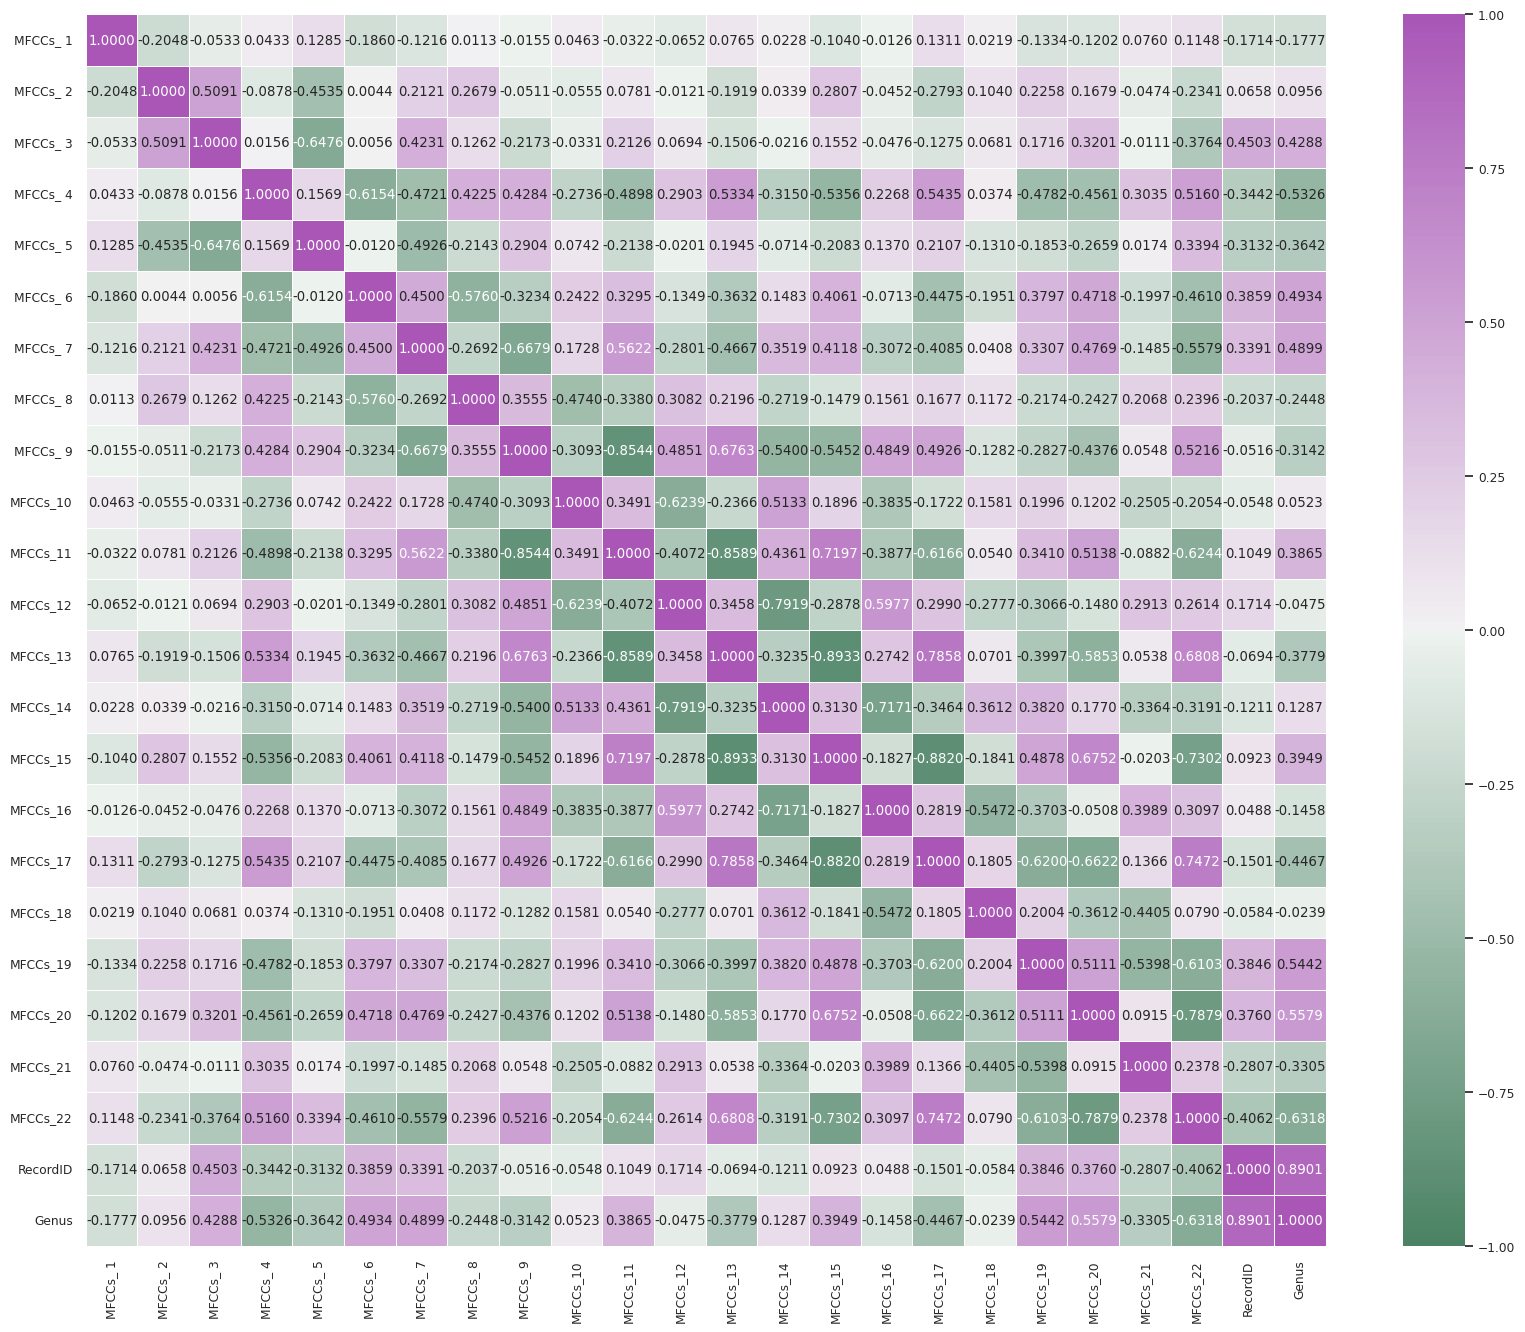

In [62]:
# calculate correlation
df_corr = dff.corr()

# correlation matrix
sns.set(font_scale=0.8)
plt.figure(figsize=(20,16))
sns.heatmap(df_corr, annot=True, fmt=".4f",vmin=-1, vmax=1, linewidths=.5, cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True))

#plt.yticks(rotation=0)
plt.show()

<Axes: title={'center': 'Feature importance from RandomForest'}>

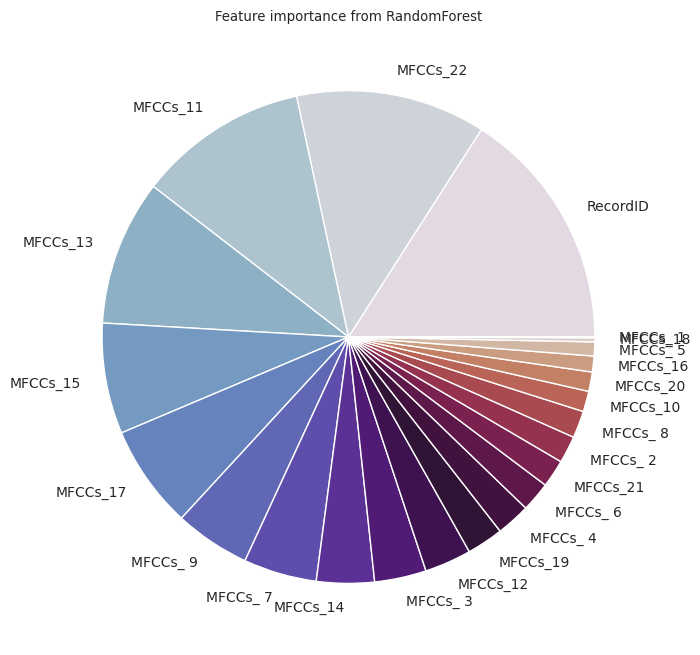

In [35]:
#X, y splitting
X_imp=df_final.iloc[:,:23]
y_imp=df_final.iloc[:,-1]

#feature importances
rf_clf = RandomForestClassifier(n_estimators = 100, max_depth=5)
rf_clf.fit(X_imp, y_imp)

pd.Series(rf_clf.feature_importances_, index = X_imp.columns).nlargest(24).plot(kind = 'pie',
                                                                                figsize = (8, 8),
                                                                                title = 'Feature importance from RandomForest', colormap='twilight', fontsize=10)

Dado que MFCCs_18 tiene muy poca importancia y baja correlación entre los objetivos, debemos descartarlo.

In [36]:
dff.drop(columns=["MFCCs_18"], inplace=True)

### clustering

#### k-means

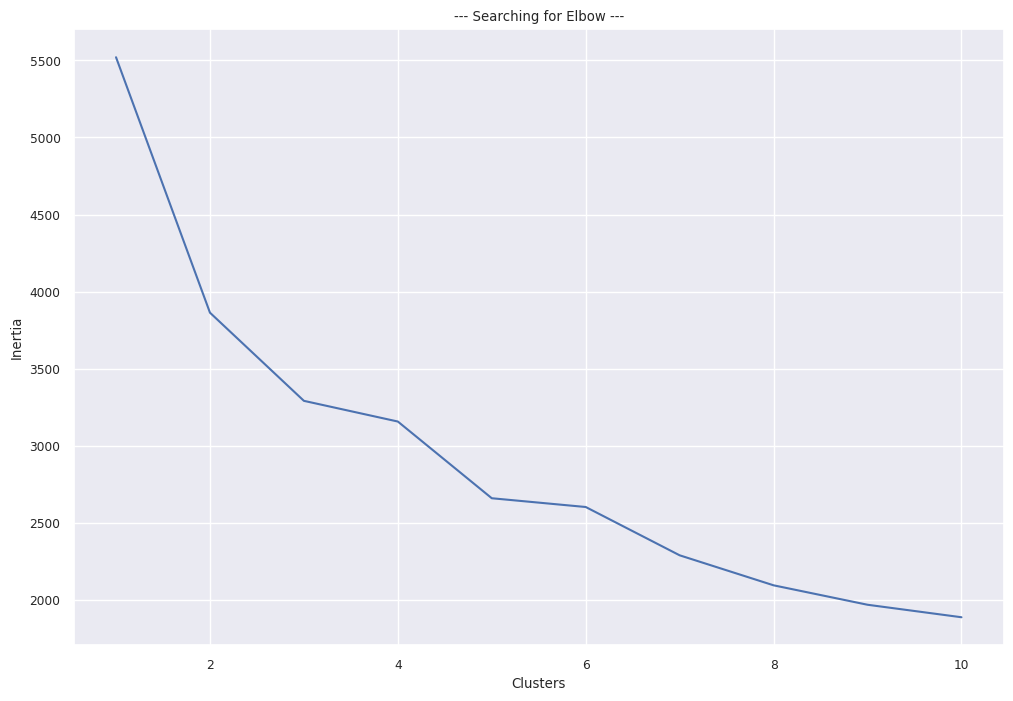

In [63]:
# run k-means for range of 10 clusters then analyse with elbow method
clusters = []

#drop target
X=dff.drop(columns=["Genus"])
#y=dff["Family"]
y = dff.iloc[:,-1].values.reshape(1, -1)

#Sum of squared distances of samples to their closest cluster center.
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('--- Searching for Elbow ---')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

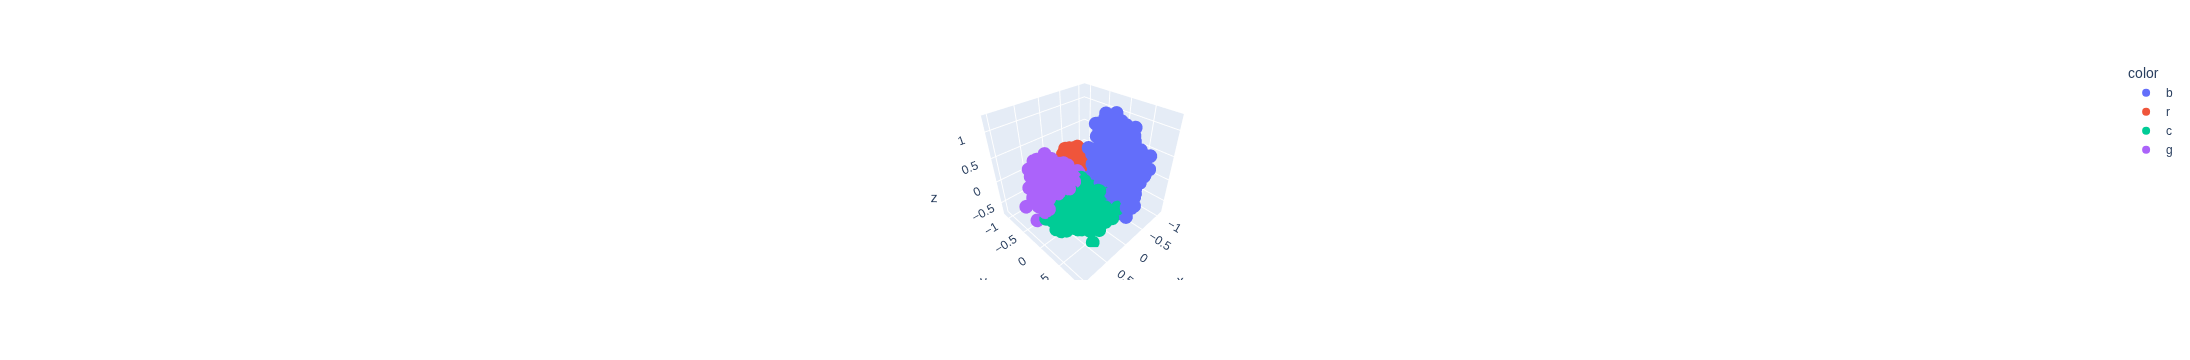

In [64]:
#PCA for reducing dimensions to 3
pca = PCA(n_components=3)
pca_X = pca.fit_transform(X)


colors = np.array([x for x in 'bgrcmykbgr'])
#running k-means on resuts of pca
km_pca = KMeans(n_clusters=4).fit(pca_X)
fig = px.scatter_3d(x=pca_X[:,0], y=pca_X[:,1], z=pca_X[:,2],color=colors[km_pca.labels_])
fig.show()

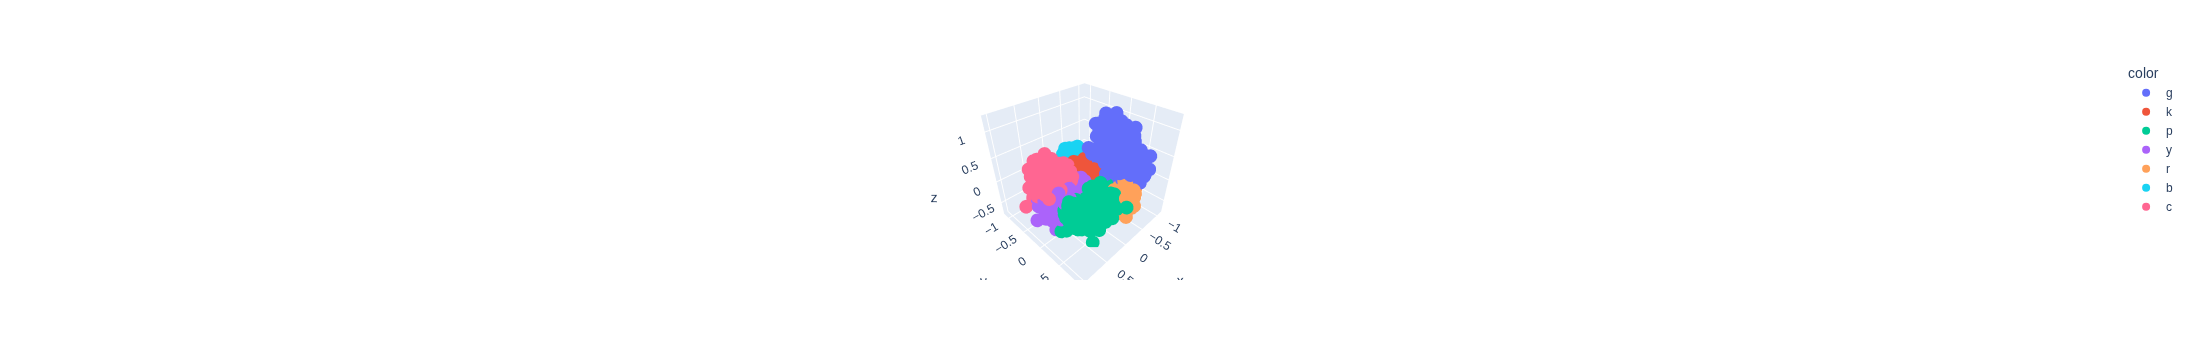

In [65]:
colors = np.array([x for x in 'ykbgrpcm'])
#running k-means on resuts of pca
km_pca_2 = KMeans(n_clusters=7).fit(pca_X)
fig = px.scatter_3d(x=pca_X[:,0], y=pca_X[:,1], z=pca_X[:,2],color=colors[km_pca_2.labels_])
fig.show()

In [66]:
dff['KMEANS_4']=km_pca.labels_

In [67]:
dff

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.362796  0.164901  0.222401  0.763950  0.754901  0.616270   
1          1.0  0.378319  0.170567  0.298727  0.795404  0.766543  0.565158   
2          1.0  0.362279  0.184281  0.319811  0.703614  0.646144  0.498738   
3          1.0  0.422437  0.357357  0.367503  0.844356  0.908672  0.507387   
4          1.0  0.308444  0.196817  0.342177  0.784052  0.737076  0.496406   
...        ...       ...       ...       ...       ...       ...       ...   
7190       1.0  0.505228  0.522105  0.036175  0.349826  0.505125  0.607279   
7191       1.0  0.505228  0.522105  0.030696  0.399027  0.972925  0.610769   
7192       1.0  0.505228  0.522105  0.029337  0.393288  0.946395  0.634061   
7193       1.0  0.505228  0.522105  0.498913  0.406013  0.933410  0.598330   
7194       1.0  0.505228  0.522105  0.066089  0.413844  0.964179  0.608180   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_16  MFCCs_17  MFCCs_18  \
0     0.217665  0.208748  0.639732  ...  0.366362  0.258090  0.289669   
1     0.086179  0.173199  0.736989  ...  0.437716  0.281131  0.340475   
2     0.050299  0.162057  0.866764  ...  0.579305  0.334543  0.419692   
3     0.137252  0.279668  0.946405  ...  0.314475  0.221417  0.050438   
4     0.008192  0.207219  0.938110  ...  0.538324  0.336939  0.348743   
...        ...       ...       ...  ...       ...       ...       ...   
7190  0.307203  0.411177  0.547957  ...  0.412207  0.493816  0.647316   
7191  0.278680  0.437077  0.564710  ...  0.426697  0.482807  0.642447   
7192  0.302547  0.443535  0.548467  ...  0.431130  0.511112  0.663606   
7193  0.279881  0.430516  0.565304  ...  0.417723  0.470435  0.642676   
7194  0.276481  0.432359  0.537656  ...  0.422144  0.483242  0.652085   

      MFCCs_19  MFCCs_20  MFCCs_21  MFCCs_22  RecordID  Genus  KMEANS_4  
0     0.589181  0.735991  0.693240  0.417972       0.0      0         0  
1     0.531843  0.657398  0.607720  0.438874       0.0      0         0  
2     0.461843  0.562729  0.647279  0.505831       0.0      0         0  
3     0.319750  0.500591  0.370645  0.431773       0.0      0         0  
4     0.413209  0.549620  0.669592  0.508729       0.0      0         0  
...        ...       ...       ...       ...       ...    ...       ...  
7190  0.658603  0.725033  0.363203  0.287280       1.0      7         2  
7191  0.650035  0.712498  0.378331  0.256614       1.0      7         2  
7192  0.588914  0.673504  0.413293  0.286493       1.0      7         2  
7193  0.650521  0.702747  0.348993  0.263569       1.0      7         2  
7194  0.601632  0.681303  0.345602  0.276076       1.0      7         2  

[7195 rows x 25 columns]

Decide qué grupo pertenece a qué genero.

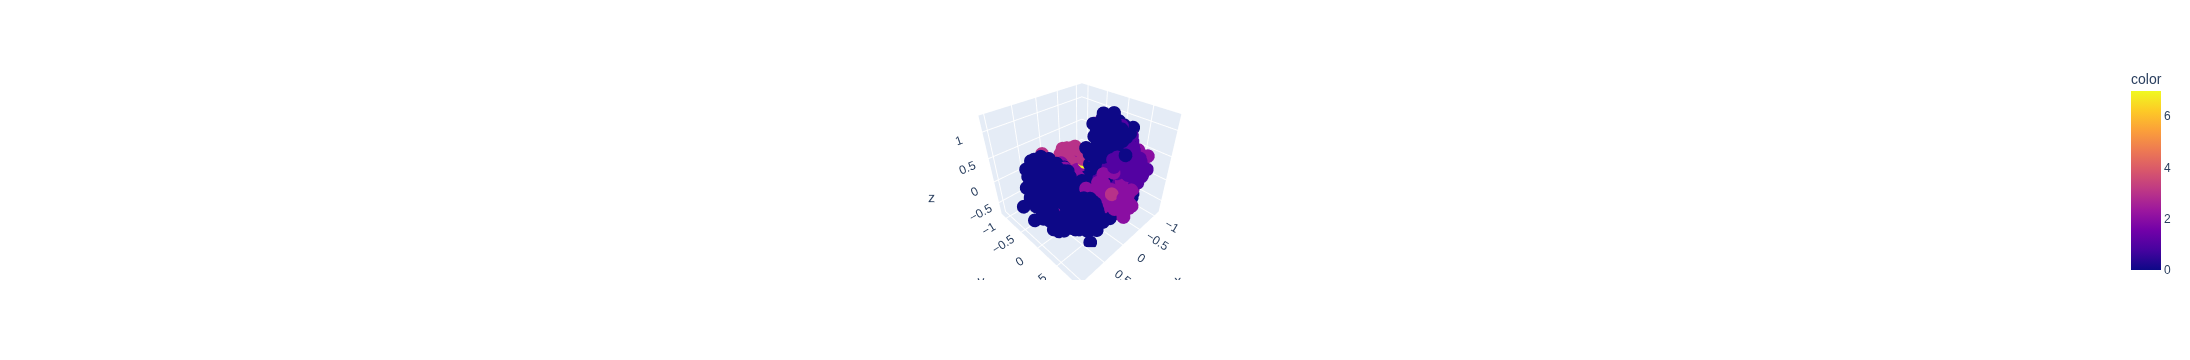

In [69]:
unique_genera = dff["Genus"].unique()
colors = np.array([x for x in 'bgrcmykbgr'][:len(unique_genera)])  # Ajustar colores según el número de géneros

# Mapear los géneros a índices
color_indices = {genus: idx for idx, genus in enumerate(unique_genera)}
color_labels = dff["Genus"].map(color_indices)

fig = px.scatter_3d(x=pca_X[:,0], y=pca_X[:,1], z=pca_X[:,2], color=color_labels)
fig.show()

#### AGNES

Dado que no hay inercia en AGNES, utilizaremos el coeficiente de silueta (mejor --> 1, peor --> -1) para seleccionar el número de grupo de AGNES.

In [70]:
def silhouette_plot(X, y, n_clusters, ax=None):
    if ax is None:
        ax = plt.gca()

    # Compute the silhouette scores for each sample
    silhouette_avg = silhouette_score(X, y)
    sample_silhouette_values = silhouette_samples(X, y)

    y_lower = padding = 2
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        ith_cluster_silhouette_values = sample_silhouette_values[y == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0,
                         ith_cluster_silhouette_values,
                         facecolor=color,
                         edgecolor=color,
                         alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))

        # Compute the new y_lower for next plot
        y_lower = y_upper + padding

    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax.axvline(x=silhouette_avg, c='r', alpha=0.8, lw=0.8, ls='-')
    ax.annotate('Average',
                xytext=(silhouette_avg, y_lower * 1.025),
                xy=(0, 0),
                ha='center',
                alpha=0.8,
                c='r')

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.set_ylim(0, y_upper + 1)
    ax.set_xlim(-0.075, 1.0)
    return ax

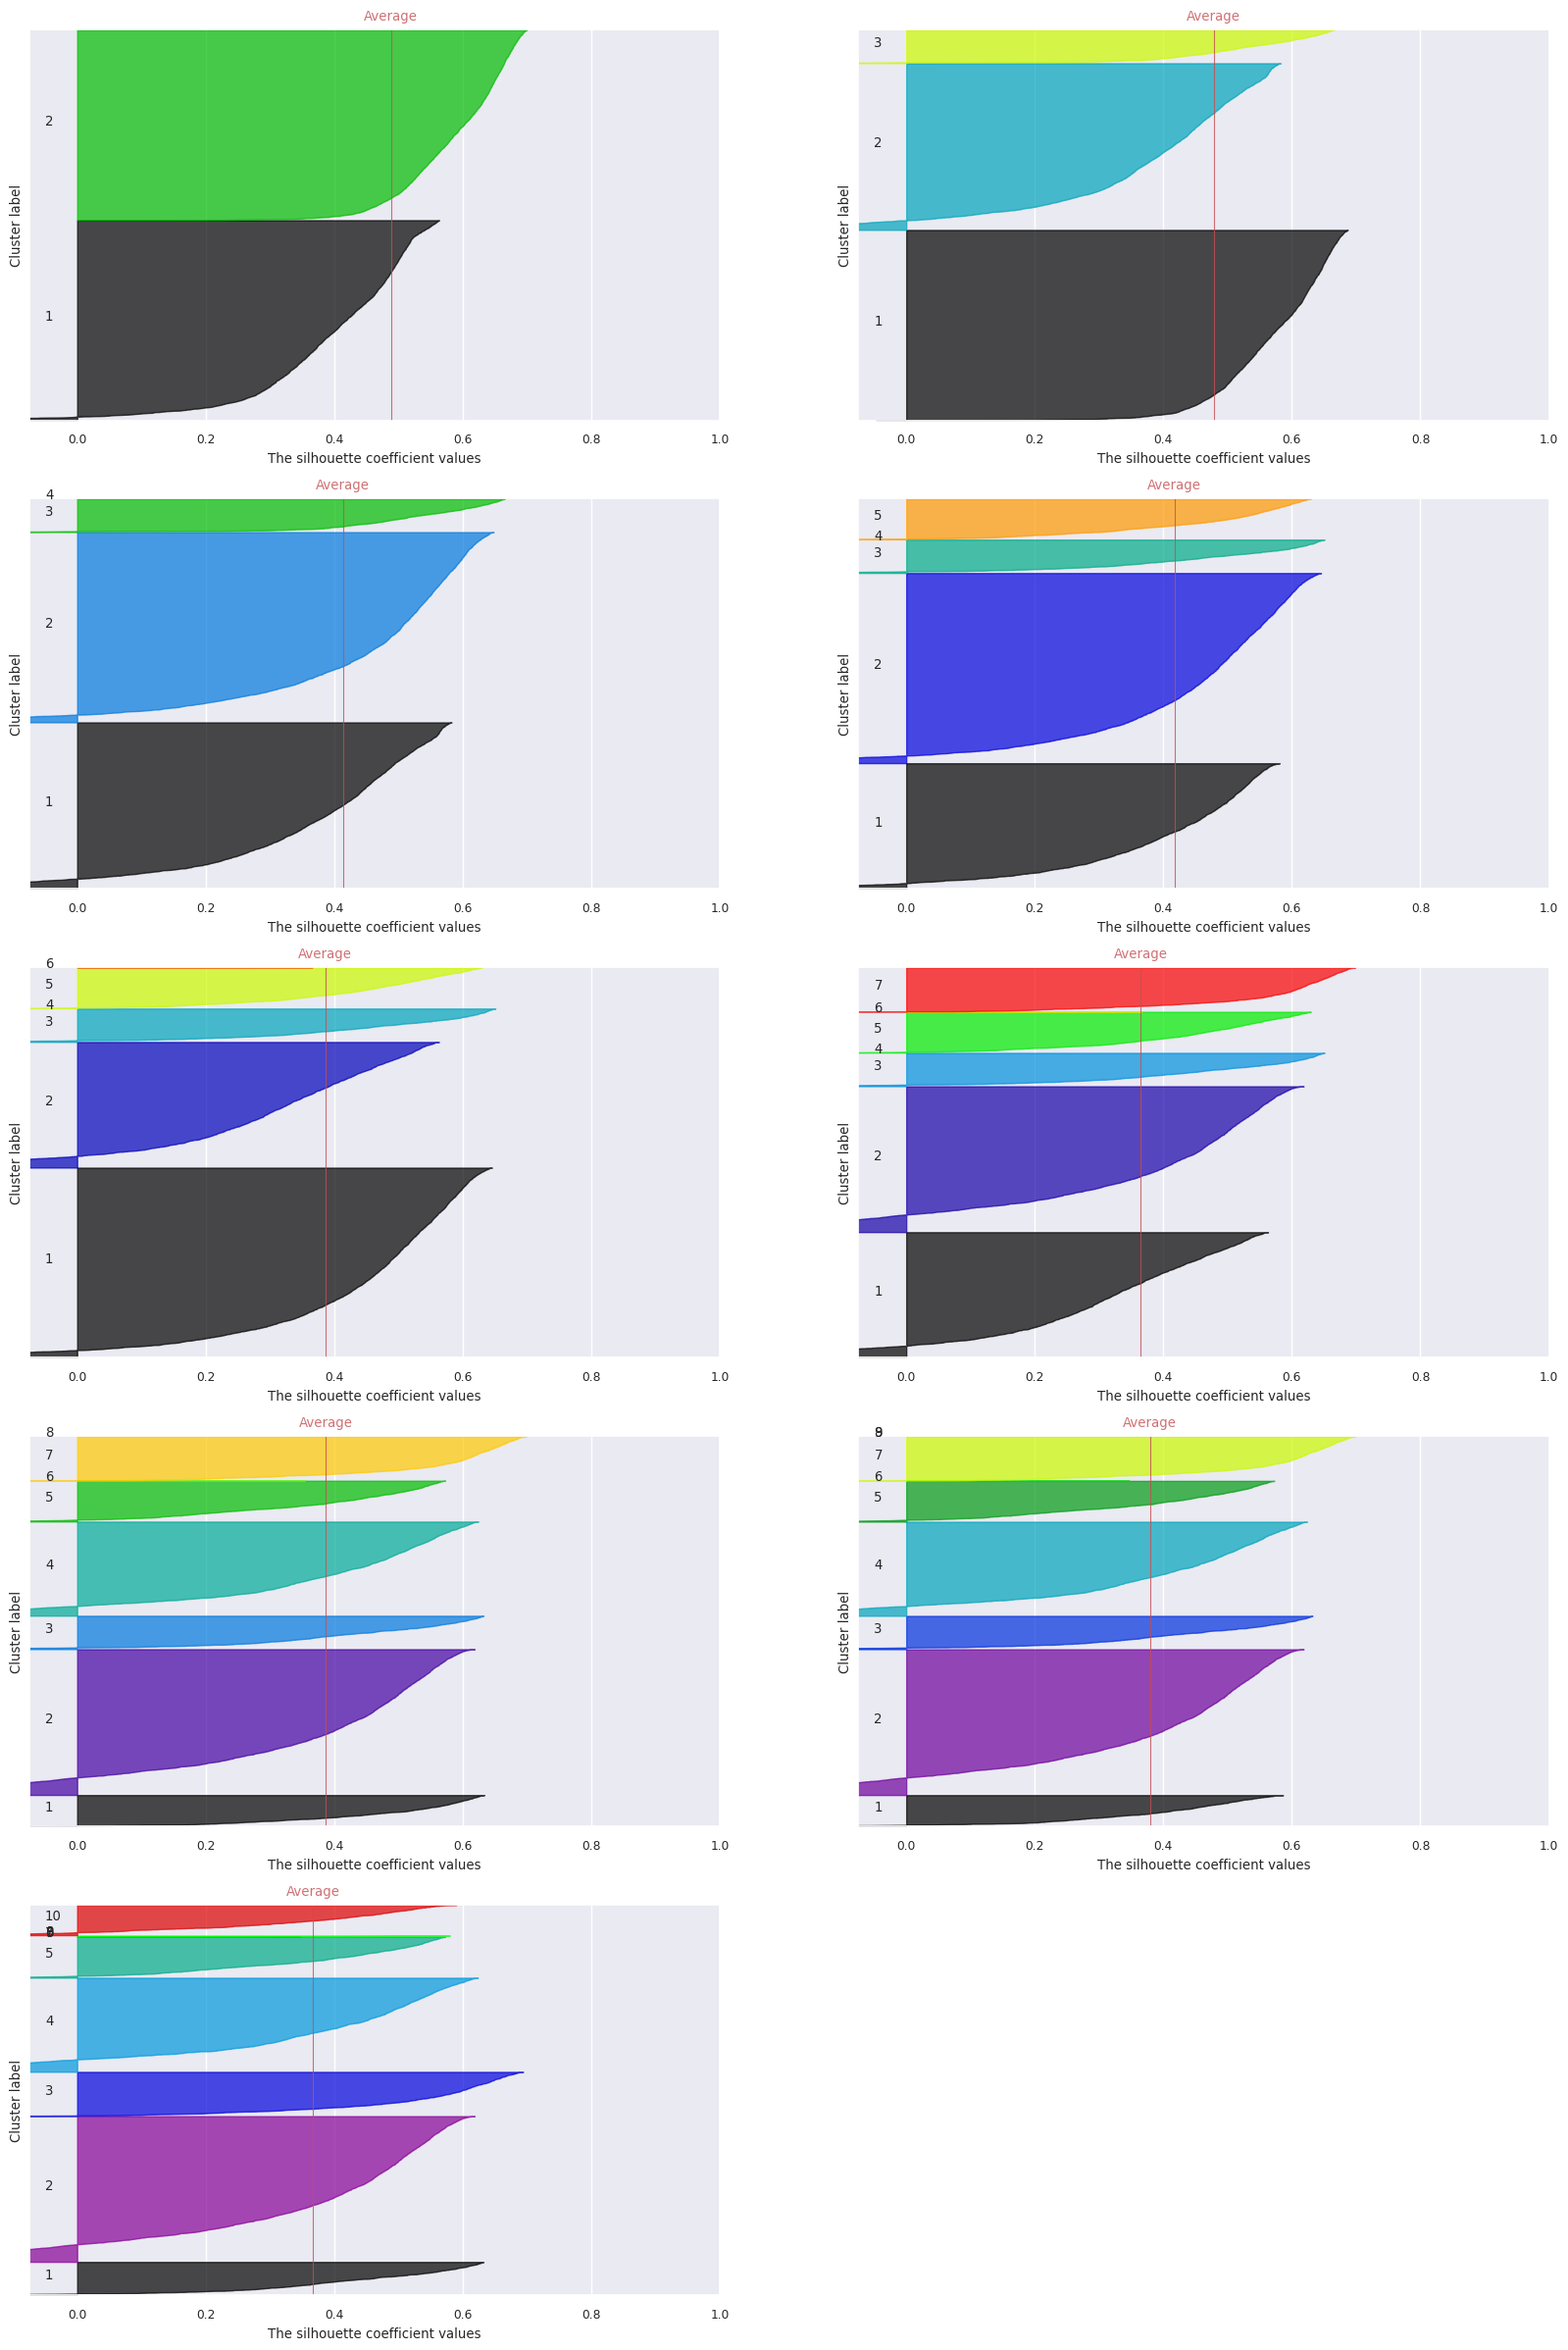

In [71]:
# plot silhouette coefficients
plt.figure(figsize=(20,30))
for i in range(2,11):  
    agnes = AgglomerativeClustering(n_clusters=i, linkage='average')
    agnes_labels = agnes.fit_predict(pca_X)
    plt.subplot(5, 2, i-1)
    silhouette_plot(pca_X, agnes_labels, i)

Parece que se elegirá el tamaño de clúster = ?? entre otros porque no tienen clústeres equilibrados y tienen puntuaciones de silueta negativas.

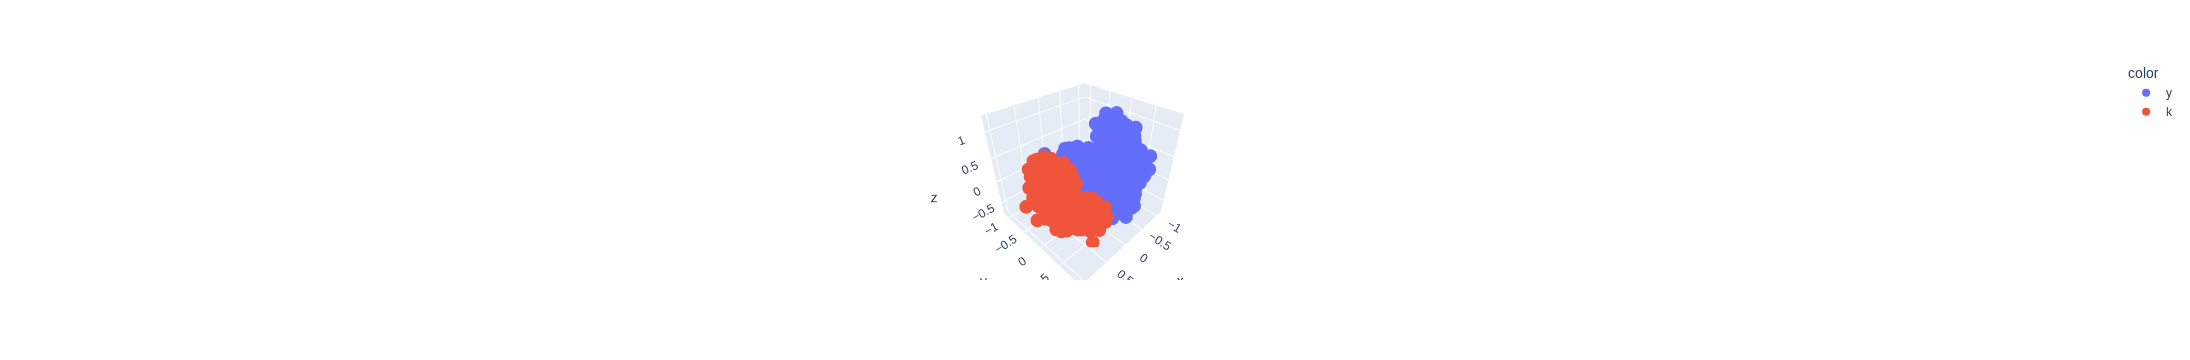

In [72]:
#2 clusters
colors = np.array([x for x in 'ykbgrpcm'])
agnes2 = AgglomerativeClustering(n_clusters=2, linkage='average').fit(pca_X)

fig = px.scatter_3d(x=pca_X[:,0], y=pca_X[:,1],z=pca_X[:,2], color=colors[agnes2.labels_])
fig.show()

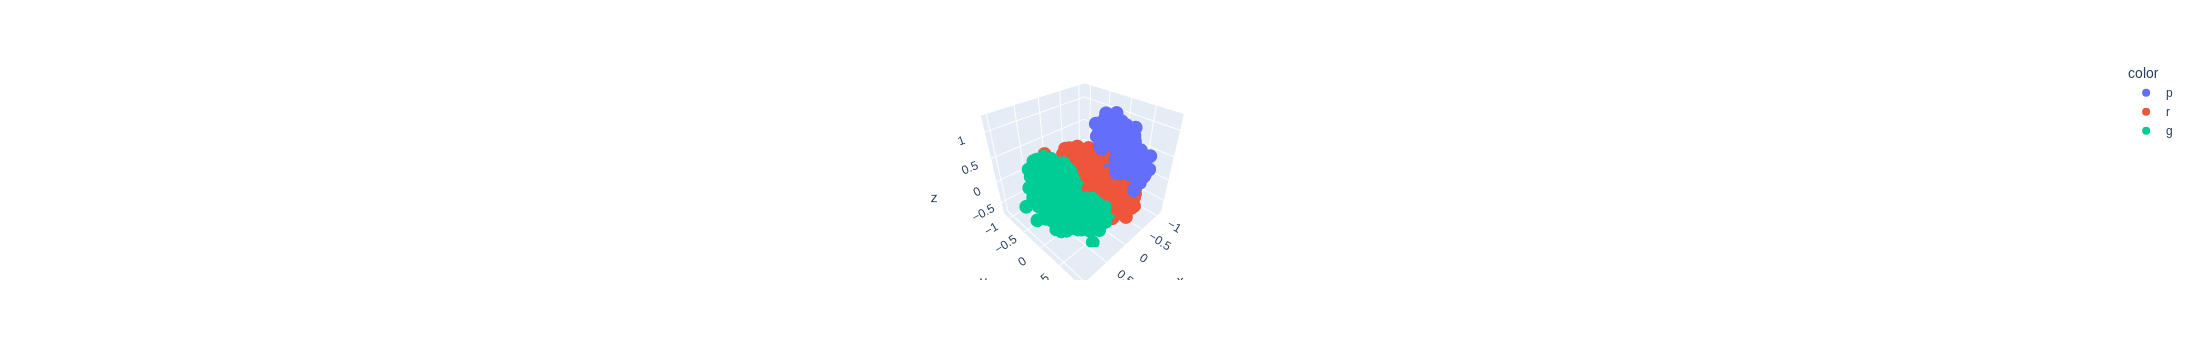

In [75]:
#3 clusters
colors = np.array([x for x in 'grpcmykb'])
agnes4 = AgglomerativeClustering(n_clusters=3, linkage='average').fit(pca_X)

fig = px.scatter_3d(x=pca_X[:,0], y=pca_X[:,1],z=pca_X[:,2], color=colors[agnes4.labels_])
fig.show()

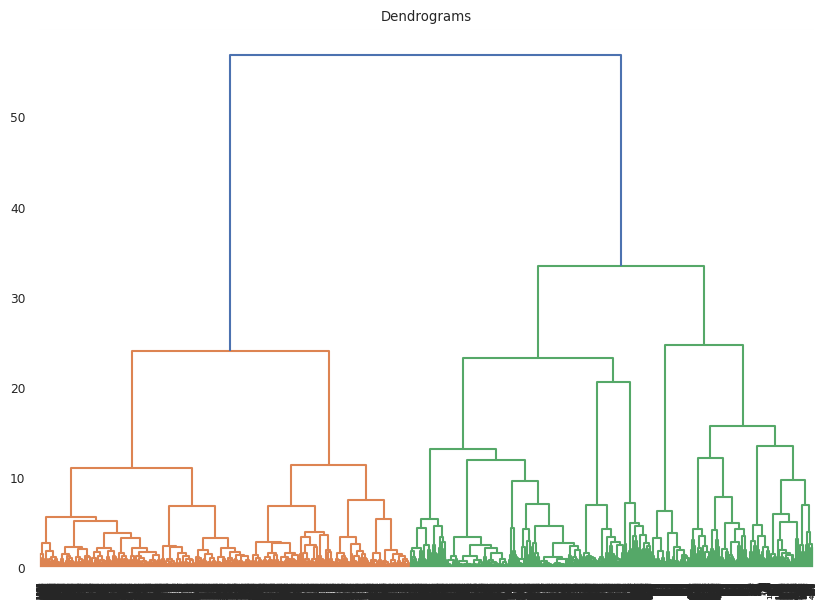

In [76]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [77]:
dff['AGNES_4']=agnes4.labels_

#### DBSCAN

- eps: La distancia máxima entre dos muestras para que una se considere como vecina de la otra (valor predeterminado: 0,5).
- min_samples: Número de muestras (o ponderación total) en una vecindad para que un punto se considere un punto central. Esto incluye el punto mismo (valor predeterminado: 5).

In [78]:
# search for best parameters by using silhouette_score
score_list=[]
for eps in np.arange(0.5, 20, 0.5):
    for min_samples in range(3, 20):
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = db.labels_
        n = len(np.unique(labels))
        if n>1:
            score=silhouette_score(X, labels)
            score_list.append((score, (eps, min_samples)))
     
biggest_score = sorted(score_list)[-1]  
best_eps, best_min = biggest_score[1]
best_eps, best_min

(1.0, 4)

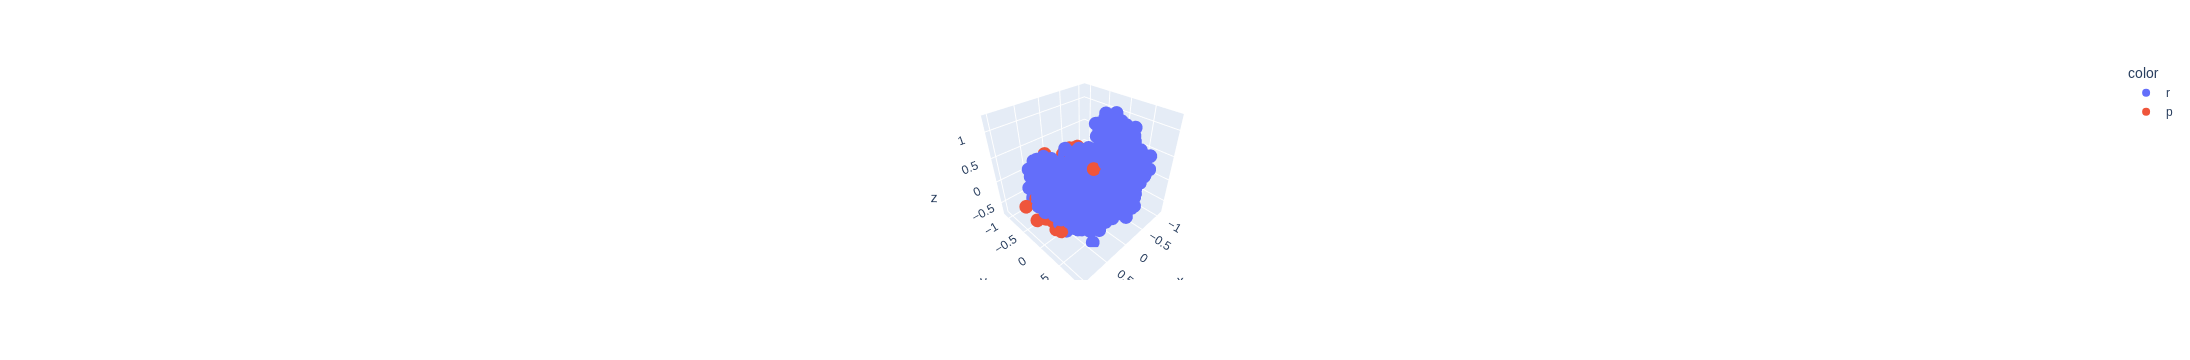

In [81]:
# best model for DBSCAN
db_best = DBSCAN(eps=best_eps, min_samples=best_min).fit(X)

#best clusters
colors = np.array([x for x in 'rpcmykgb'])

fig = px.scatter_3d(x=pca_X[:,0], y=pca_X[:,1],z=pca_X[:,2], color=colors[db_best.labels_])
fig.show()

In [82]:
dff['DBSCAN_best']=db_best.labels_

### Evaluación

Ahora hagamos una comparación entre los algoritmos de agrupamiento K-MEANS - AGNES - DBSCAN, ya que tenemos valores de verdad fundamentales para el atributo "Familia".

- Número estimado de conglomerados
- Número estimado de puntos de ruido
- Homogeneidad: Para una agrupación perfecta, cada conglomerado contiene solo miembros de una sola clase.
- Puntuación de Fowlkes-Mallows: Media geométrica de precisión y recuperación.
- Coeficiente de silueta: Si se desconocen las etiquetas de la verdad fundamental, el coeficiente de silueta se calcula utilizando la distancia media intraconglomerado (a) y la distancia media al conglomerado más cercano (b) para cada muestra mediante (b - a) / máx. (a, b)

In [83]:
# print metric for chosen models
models = [km_pca, agnes4, db_best] 
names = ["K-MEANS:", "AGNES:", "DBSCAN:"]


for i, model in enumerate(models):
    labels = model.labels_
    n = len(np.unique(labels))
    y_scaled = np.round(MinMaxScaler((0, n)).fit_transform(y)).ravel()
    
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print(names[i])
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    print("Homogeneity: %0.3f" % homogeneity_score(y_scaled, labels))
    print("Fowlkes-Mallows score: %0.3f"
          % fowlkes_mallows_score(y_scaled, labels))
    print("Silhouette Coefficient: %0.3f"
          % silhouette_score(X, labels))
    print("\n######################################\n")

K-MEANS:
Estimated number of clusters: 4
Estimated number of noise points: 0
Homogeneity: 1.000
Fowlkes-Mallows score: 0.507
Silhouette Coefficient: 0.210

######################################

AGNES:
Estimated number of clusters: 3
Estimated number of noise points: 0
Homogeneity: 1.000
Fowlkes-Mallows score: 0.654
Silhouette Coefficient: 0.320

######################################

DBSCAN:
Estimated number of clusters: 2
Estimated number of noise points: 0
Homogeneity: 1.000
Fowlkes-Mallows score: 0.966
Silhouette Coefficient: 0.305

######################################



#### Aprendizaje semi-supervisado 

In [85]:
X_supervised = dff.drop(columns=["Genus"])
y_supervised = dff["Genus"]

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_supervised, y_supervised, test_size=0.3, random_state=42)

In [90]:
from sklearn.model_selection import cross_val_score

rf_clf_supervised = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
# Use cross-validation to evaluate the supervised model
cv_scores_supervised = cross_val_score(rf_clf_supervised, X_supervised, y_supervised, cv=5, scoring='accuracy')

print(f"Cross-validation Accuracy (Supervised Model): {cv_scores_supervised.mean():.3f} (+/- {cv_scores_supervised.std():.3f})")

# Train the model on the full training data for later evaluation on the test set
rf_clf_supervised.fit(X_train, y_train)

Cross-validation Accuracy (Supervised Model): 0.875 (+/- 0.195)


RandomForestClassifier(max_depth=5, random_state=42)

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_supervised = rf_clf_supervised.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_supervised)
precision = precision_score(y_test, y_pred_supervised, average='weighted')
recall = recall_score(y_test, y_pred_supervised, average='weighted')
f1 = f1_score(y_test, y_pred_supervised, average='weighted')

print(f"Test Set Performance (Supervised Model):")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

Test Set Performance (Supervised Model):
Accuracy: 0.980
Precision: 0.981
Recall: 0.980
F1-score: 0.979


In [92]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# 1. Create a new DataFrame for the baseline model
X_baseline = X_supervised.drop(columns=['KMEANS_4', 'AGNES_4', 'DBSCAN_best'])

# 2. Split this new baseline DataFrame and the target variable y_supervised
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X_baseline, y_supervised, test_size=0.3, random_state=42)

# 3. Train a RandomForestClassifier model on the baseline training data
rf_clf_baseline = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Use cross-validation to evaluate the baseline model
cv_scores_baseline = cross_val_score(rf_clf_baseline, X_baseline, y_supervised, cv=5, scoring='accuracy')

print(f"\nCross-validation Accuracy (Baseline Model): {cv_scores_baseline.mean():.3f} (+/- {cv_scores_baseline.std():.3f})")

# Train the model on the full training data for later evaluation on the test set
rf_clf_baseline.fit(X_train_baseline, y_train_baseline)

# 4. Predict the 'Genus' on the baseline test data
y_pred_baseline = rf_clf_baseline.predict(X_test_baseline)

# 5. Calculate and print the evaluation metrics for the baseline model
accuracy_baseline = accuracy_score(y_test_baseline, y_pred_baseline)
precision_baseline = precision_score(y_test_baseline, y_pred_baseline, average='weighted')
recall_baseline = recall_score(y_test_baseline, y_pred_baseline, average='weighted')
f1_baseline = f1_score(y_test_baseline, y_pred_baseline, average='weighted')

print(f"\nTest Set Performance (Baseline Model):")
print(f"Accuracy: {accuracy_baseline:.3f}")
print(f"Precision: {precision_baseline:.3f}")
print(f"Recall: {recall_baseline:.3f}")
print(f"F1-score: {f1_baseline:.3f}")


Cross-validation Accuracy (Baseline Model): 0.861 (+/- 0.191)

Test Set Performance (Baseline Model):
Accuracy: 0.968
Precision: 0.970
Recall: 0.968
F1-score: 0.963
